In [24]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [98]:
df = pd.concat([pd.read_csv("results_all.csv"), pd.read_csv("results_all_2.csv")]).iloc[:,1:].drop_duplicates()
## Only takes approved and rejected websites
df = df[df.label.isin(['APPROVED', 'REJECTED'])]
## Comment the code below if you want anomaly to be included
df = df[~(((df.broken_link_score == 100) & (df.label == 'APPROVED')) | \
          ((df['link_tnc_exist'] == 0) & (df['tnc_refund_policy_exist'] == 0))) | (df.label == 'REJECTED')]

In [99]:
df.groupby("label").size()

label
APPROVED    150
REJECTED     25
dtype: int64

In [100]:
y = df['label'].apply(lambda x: 1 if x == 'APPROVED' else 0)

In [101]:
X = df.iloc[:, 1:10]

## Train/Test Split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [120]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [121]:
y_pred = clf.predict(X_test)

In [122]:
y_pred_proba = clf.predict_proba(X_test)

In [123]:
accuracy_score(y_test, y_pred)

0.896551724137931

In [107]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(6, 2, 4, 46)

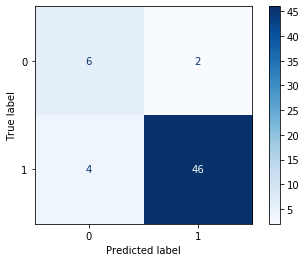

In [108]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])

In [110]:
auc_score = auc(fpr, tpr)

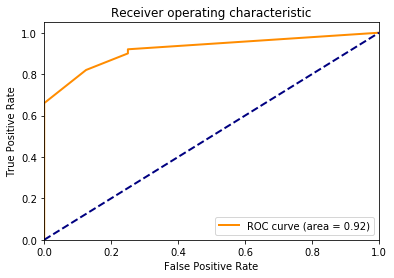

In [111]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [112]:
gini_score = abs(2 * auc_score) - 1
gini_score

0.8399999999999999

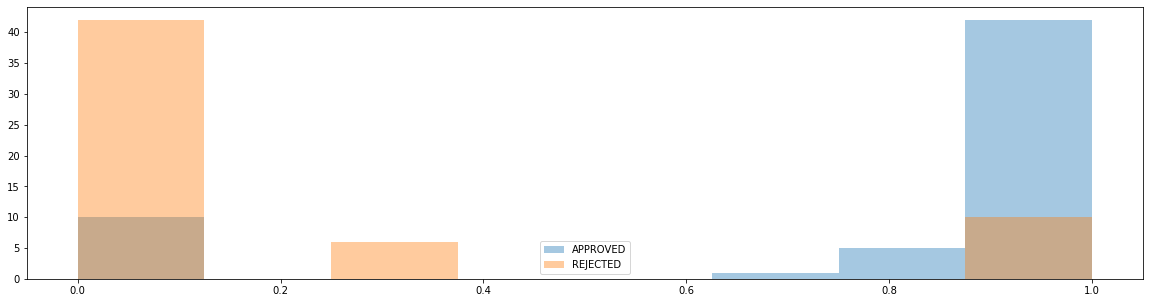

In [113]:
plt.figure(figsize=(20,5))
sns.distplot(y_pred_proba[:,1], kde=False, label='APPROVED')
sns.distplot(y_pred_proba[:,0], kde=False, label='REJECTED')
plt.legend()
plt.show()

## Cross Validation

In [114]:
clf = tree.DecisionTreeClassifier()

In [115]:
cv_results = cross_validate(clf, X, y, scoring='roc_auc', cv=5)

In [116]:
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score']

In [117]:
cv_results['test_score']

array([0.86      , 1.        , 0.95333333, 0.77333333, 0.84333333])

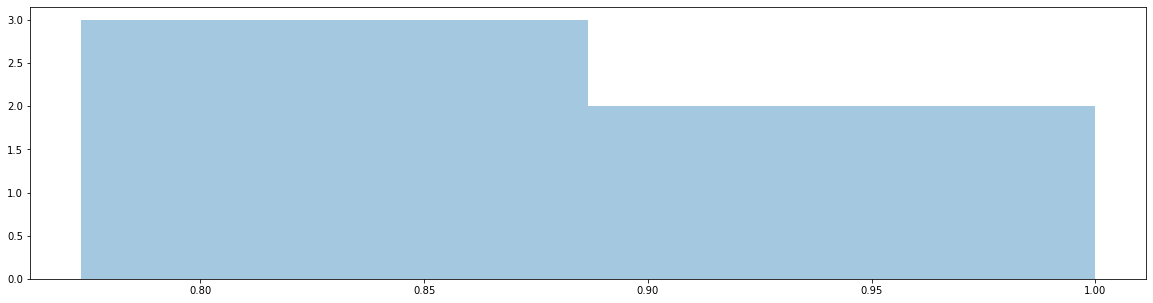

In [118]:
plt.figure(figsize=(20,5))
sns.distplot(cv_results['test_score'], kde=False)
plt.show()